In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import kaggle
import zipfile

In [60]:
sns.set_style("dark")
sns.set_palette("dark")

In [35]:
#download dataset from kaggle using the Kaggle API
!kaggle datasets download -d leonardopena/top-spotify-songs-from-20102019-by-year

top-spotify-songs-from-20102019-by-year.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
#extracting file from the previously downloaded zip from kaggle
zipfile_name = 'top-spotify-songs-from-20102019-by-year.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [37]:
#Creating data frame from the csv
spotify = pd.read_csv("top10s.csv", encoding = 'latin-1')

## Step 1: Data Understanding
- Dataframe ```shape```
- ```head``` and ```tail```
- ```dtypes```
- ```describe```

In [38]:
spotify.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [39]:
spotify.tail()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69
602,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,13,23,213,6,6,67


The data gathered starts from 2010 and ends in 2019

In [40]:
spotify.shape

(603, 15)

It consists of 603 songs

In [41]:
detail_data = {
    'Unnamed: 0' : ['ID'],
    'title' : ['Song\'s title'],
    'artist' : ['Song\'s artist'],
    'top genre' : ['The genre of the track'],
    'year' : ['Song\'s year in the Billboard'],
    'bpm' : ['Beats Per Minute - The tempo of the song'],
    'nrgy' : ['The energy of a song - the higher the value, the more energetic the song'],
    'dnce': ['Danceability - The higher the value, the easier it is to dance to this song'],
    'dB' : ['Loudness, Decibel - The higher the value, the louder the song'],
    'live' : ['Liveness - The higher the value, the more likely the song is a live recording'],
    'val' :['Valence - The higher the value, the more positive mood for the song'],
    'dur' : ['Length - The duration of the song in seconds(?)'], 
    'acous' : ['Acousticness - The higher the value the more acoustic the song is'], 
    'spch' : ['Speechiness - The higher the value the more spoken word the song contains'], 
    'pop' : ['Popularity - The higher the value the more popular the song is']
}

detail_df = pd.DataFrame(detail_data)

Creating a dataframe that includes simple explanation of each columns

In [42]:
detail_df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,ID,Song's title,Song's artist,The genre of the track,Song's year in the Billboard,Beats Per Minute - The tempo of the song,"The energy of a song - the higher the value, t...","Danceability - The higher the value, the easie...","Loudness, Decibel - The higher the value, the ...","Liveness - The higher the value, the more like...","Valence - The higher the value, the more posit...",Length - The duration of the song in seconds(?),Acousticness - The higher the value the more a...,Speechiness - The higher the value the more sp...,Popularity - The higher the value the more pop...


In [43]:
#checking for na value
spotify.isna().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [44]:
spotify.loc[spotify.duplicated()]

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop


All values are intact, no NA and no duplicate

In [45]:
#changing columns title


spotify.columns = ['ID', 'Title', 'Artist', 'Top Genre', 'Year', 'BPM', 'Energy',
    'Danceability', 'dB', 'Liveness', 'Valence', 'Duration', 'Acousticness', 'Speechiness', 'Popularity']

To make the column title more clear, let's rename it!

In [46]:
#checking if it renamed properly
spotify.columns

Index(['ID', 'Title', 'Artist', 'Top Genre', 'Year', 'BPM', 'Energy',
       'Danceability', 'dB', 'Liveness', 'Valence', 'Duration', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [47]:
spotify.head()

,ID,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,dB,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [48]:
spotify.describe()

,ID,Year,BPM,Energy,Danceability,dB,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [49]:
most_popular_song_by_year = spotify.groupby('Year')['Popularity'].idxmax()

In [50]:
spotify_topyear = spotify.loc[most_popular_song_by_year]

In [51]:
spotify_topyear

,ID,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,dB,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
51,52,A Thousand Years,Christina Perri,dance pop,2011,139,41,42,-7,11,16,285,31,3,81
104,105,Titanium (feat. Sia),David Guetta,dance pop,2012,126,79,60,-4,13,30,245,7,10,80
139,140,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,81,51,-5,21,69,230,0,5,88
210,211,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86
268,269,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
443,444,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
508,509,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86
572,573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99


In [52]:
spotify_topyear.describe()

,ID,Year,BPM,Energy,Danceability,dB,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity
count,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,266.800000,2014.50000,114.50000,60.000000,63.600000,-5.300000,12.300000,51.000000,240.900000,34.900000,5.700000,85.800000
std,198.726948,3.02765,24.46426,23.299976,15.356504,1.702939,4.473378,26.774781,30.913679,33.909848,2.945807,5.287301
min,1.000000,2010.00000,79.00000,26.000000,42.000000,-7.000000,8.000000,14.000000,189.000000,0.000000,3.000000,80.000000
25%,113.750000,2012.25000,96.25000,42.000000,52.750000,-7.000000,8.250000,30.750000,220.250000,7.000000,3.250000,83.250000
50%,240.000000,2014.50000,116.50000,60.500000,63.500000,-5.500000,12.000000,58.000000,238.000000,25.000000,5.000000,85.000000
75%,424.000000,2016.75000,125.50000,80.500000,77.500000,-4.000000,13.750000,66.500000,263.750000,55.250000,7.250000,86.750000
max,573.000000,2019.00000,160.00000,89.000000,83.000000,-3.000000,21.000000,93.000000,285.000000,92.000000,11.000000,99.000000


In [53]:
correlation_matrix = spotify.corr()

popularity_correlation = correlation_matrix['Popularity']

#### Create a histogram of energy/danceability/valence/speechiness grouped by 10s

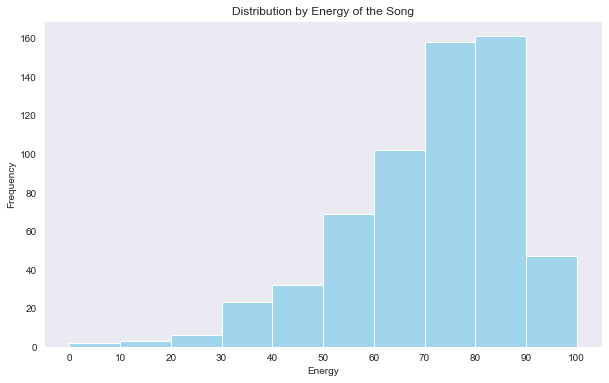

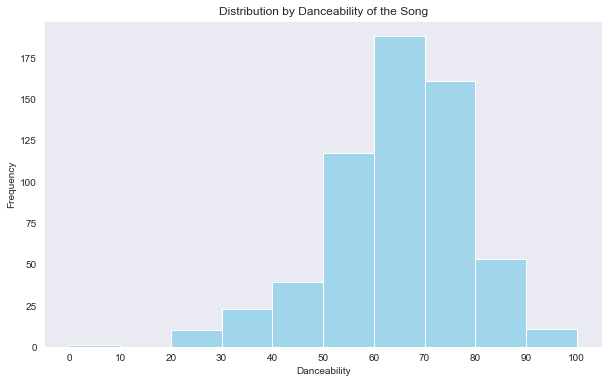

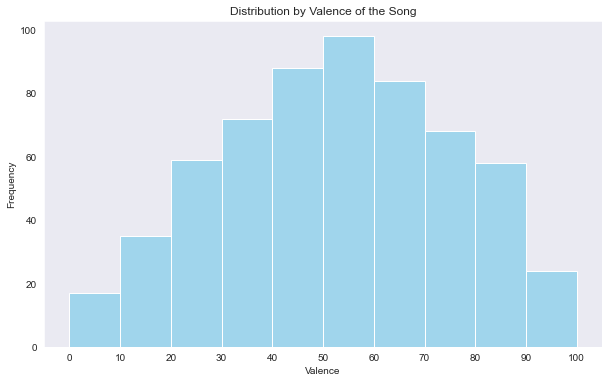

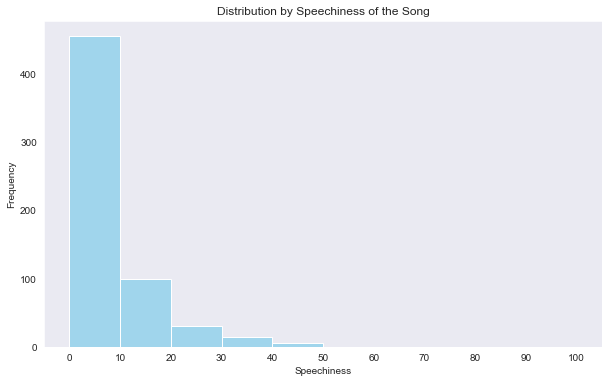

In [61]:
# Create bins for the histograms
bins = list(range(0, 101, 10))

# Loop through the columns and create histograms using Seaborn
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=spotify, x=column, bins=bins, kde=False, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution by {column} of the Song')
    plt.xticks(bins)
    plt.show()

This is for all the 603 songs, what about the top 1 for each year?

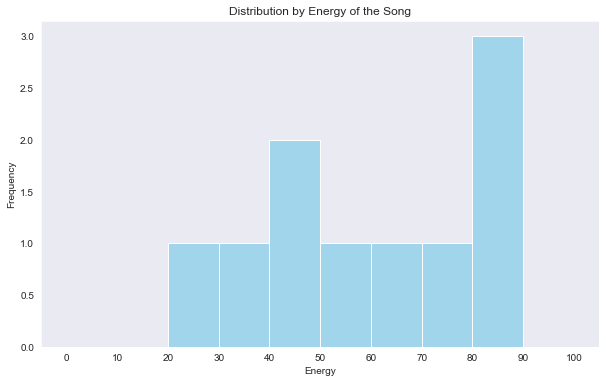

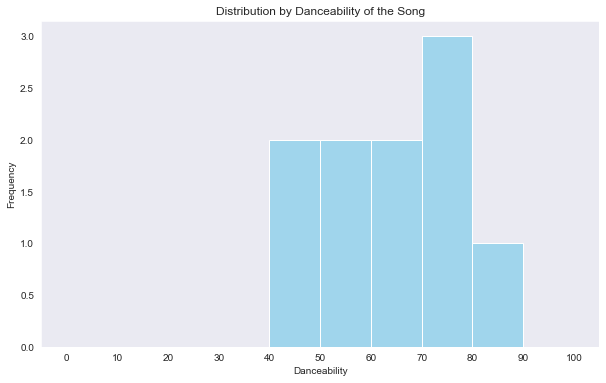

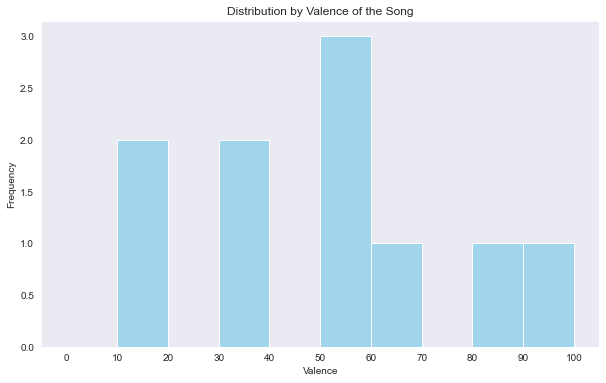

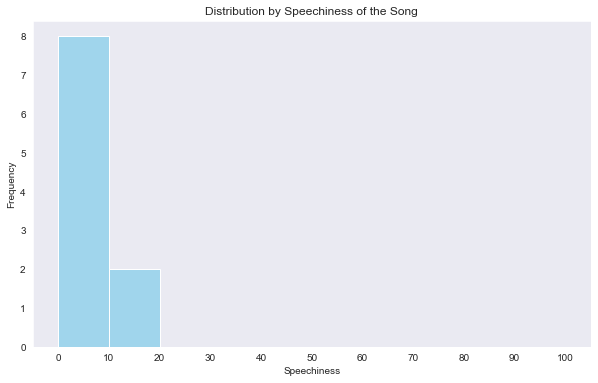

In [62]:
#same histogram with seaborn
bins = list(range(0,101,10))
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=spotify_topyear, x=column, bins=bins, kde=False, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution by {column} of the Song')
    plt.xticks(bins)
    plt.show()

Creating a heatmap for the correlations

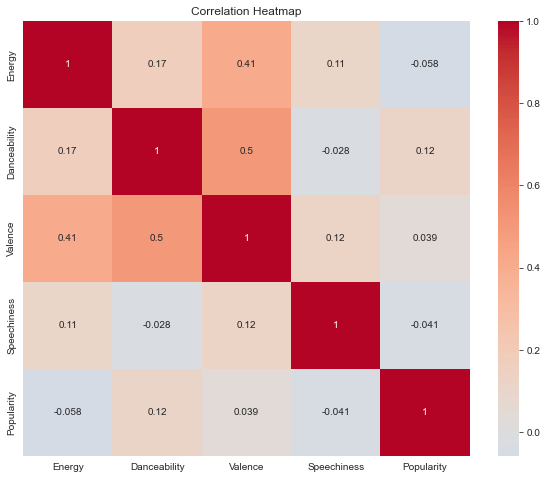

In [64]:
columns_to_visualize = ['Energy', 'Danceability', 'Valence', 'Speechiness', 'Popularity']

correlation_matrix = spotify[columns_to_visualize].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

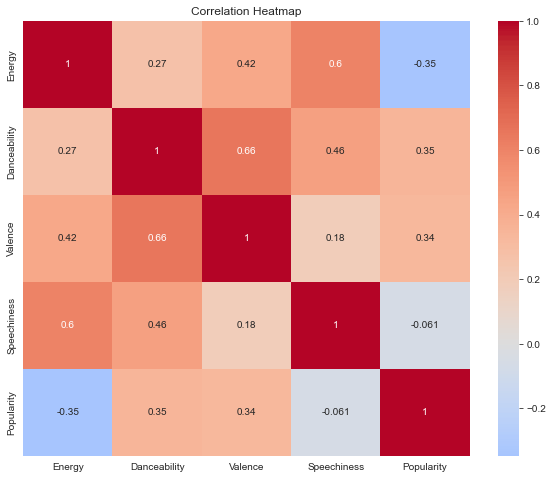

In [65]:
#heatmap for top1 only
columns_to_visualize = ['Energy', 'Danceability', 'Valence', 'Speechiness', 'Popularity']

correlation_matrix = spotify_topyear[columns_to_visualize].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Creating pairplot to show relationships between variables

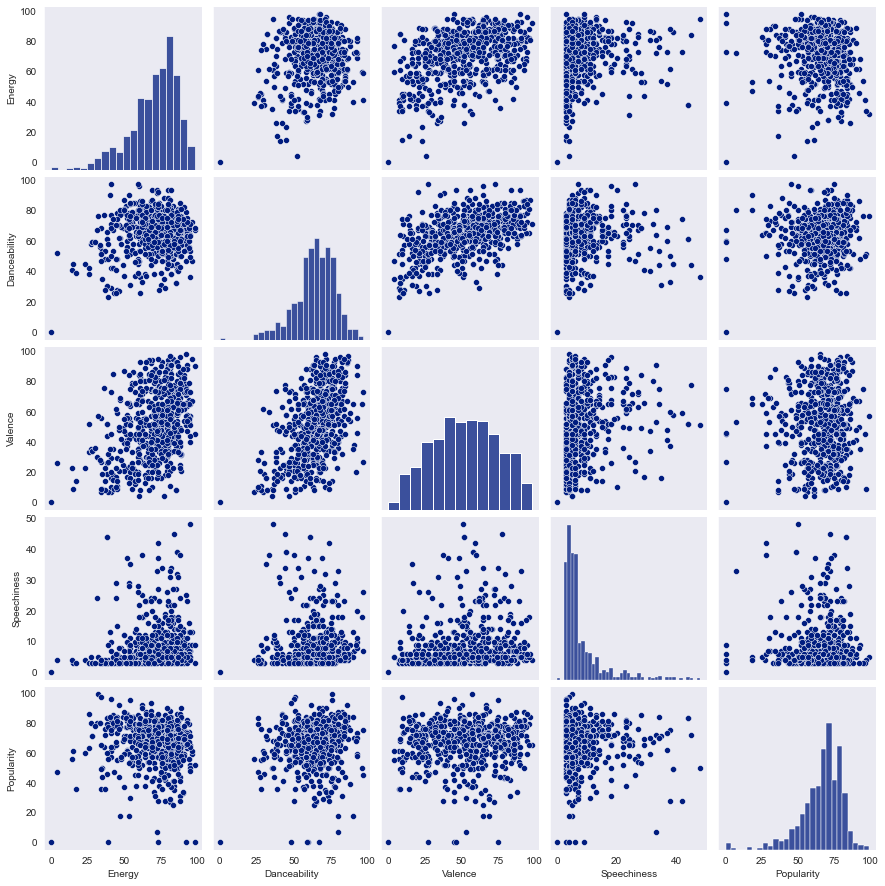

In [71]:
selected_columns = ['Energy', 'Danceability', 'Valence', 'Speechiness', 'Popularity']
sns.pairplot(spotify[selected_columns])
plt.show()